In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [2]:
df_size = pd.read_csv('project_size.csv')
df_popularity = pd.read_csv('popularity.csv')
df_dep_type = pd.read_csv('dependency_type.csv')
df_freq = pd.read_csv('time_frequency.csv')

In [3]:
df_size

,Artifact,ReleaseCount
0,com.google.apis:google-api-services-adsense,4639
1,org.wso2.identity.apps:console,3614
2,org.wso2.identity.apps:myaccount,3568
3,com.google.apis:google-api-services-youtubeAna...,3281
4,com.google.apis:google-api-services-genomics,3158
...,...,...
634998,com.appstractive:jwt-hmac-kt-android,1
634999,io.gitee.ssoss:hutool-parent,1
635000,io.github.skylarkarms:concurrents-lazy_holder,1
635001,com.abysscat:catutils,1


In [4]:
df_popularity

,Artifact,UpdateCount,Popularity
0,com.google.apis:google-api-services-adsense,4639,0
1,org.wso2.identity.apps:myaccount,3565,0
2,org.wso2.identity.apps:console,3483,0
3,com.google.apis:google-api-services-youtubeAna...,3281,0
4,com.google.apis:google-api-services-genomics,3158,0
...,...,...,...
852275,org.lwapp:lwapp-dropwizard-core,1,0
852276,com.simple:simplespec_2.10.2,1,0
852277,org.typelevel:cats-testkit_2.13,1,2
852278,com.azure:azure-security-keyvault-secrets,1,45


In [5]:
df_dep_type

,Artifact,DependencyType,Count
0,com.amazonaws:aws-java-sdk,compile,429800
1,software.amazon.awssdk:aws-sdk-java,compile,369593
2,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,compile,165630
3,io.streamnative:pulsar-presto-connector-original,compile,98459
4,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,compile,97135
...,...,...,...
1004323,com.jfinal:jfinal_weixin,provided,1
1004324,com.jfinal:jfinal_weixin,test,1
1004325,com.github.fabienbarbero:sql-api,compile,1
1004326,org.hibernate.gson-jbossmodules:gson-jbossmodules,provided,1


In [6]:
# Reused code from time_updates.ipynb
df_freq['ReleaseDate'] = pd.to_datetime(df_freq['ReleaseTimestamp'], unit='ms')
df_freq = df_freq.sort_values(by=['Project', 'ReleaseDate'])
df_freq['TimeBetweenUpdates'] = df_freq.groupby('Project')['ReleaseDate'].diff().dt.days
df_freq = df_freq.groupby('Project')['TimeBetweenUpdates'].agg(['mean']).reset_index()
df_freq

,Project,mean
0,com.google.apis:google-api-services-adsense,0.792583
1,com.google.apis:google-api-services-genomics,0.884067
2,com.google.apis:google-api-services-youtubeAna...,1.060671
3,org.wso2.carbon.apimgt:apimgt,0.880728
4,org.wso2.carbon.apimgt:apimgt-feature,0.881322
5,org.wso2.carbon.apimgt:carbon-apimgt,0.880391
6,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,0.881659
7,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,0.881322
8,org.wso2.identity.apps:console,0.253806
9,org.wso2.identity.apps:myaccount,0.255397


In [7]:
# Edit datasets so there are no duplicate columns
df_popularity.drop("UpdateCount", axis=1, inplace=True)
df_dep_type.drop("Count", axis=1, inplace=True)
df_freq.rename(columns={"Project": "Artifact", "mean": "UpdateFreq"}, inplace=True)

In [8]:
# merge it all together
df = pd.merge(df_size, df_popularity, on='Artifact')
df = pd.merge(df, df_freq, on='Artifact')
df = pd.merge(df, df_dep_type, on='Artifact')
df

,Artifact,ReleaseCount,Popularity,UpdateFreq,DependencyType
0,com.google.apis:google-api-services-adsense,4639,0,0.792583,compile
1,com.google.apis:google-api-services-youtubeAna...,3281,0,1.060671,compile
2,com.google.apis:google-api-services-genomics,3158,0,0.884067,compile
3,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881322,compile
4,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,3,0.881322,compile
5,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881659,compile
6,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881659,test
7,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881659,provided


In [9]:
df.isnull().sum()


Artifact          0
ReleaseCount      0
Popularity        0
UpdateFreq        0
DependencyType    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Artifact        8 non-null      object 
 1   ReleaseCount    8 non-null      int64  
 2   Popularity      8 non-null      int64  
 3   UpdateFreq      8 non-null      float64
 4   DependencyType  8 non-null      object 
dtypes: float64(1), int64(2), object(2)
memory usage: 452.0+ bytes


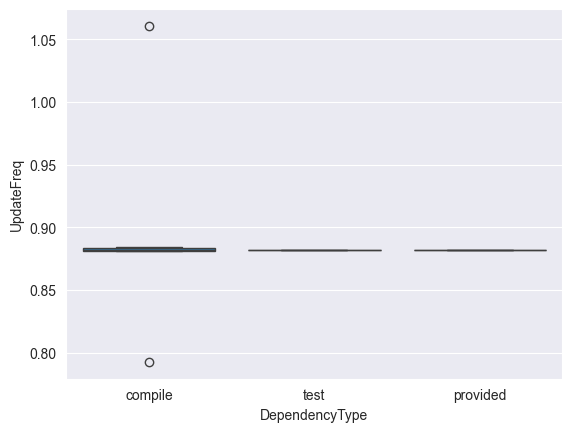

In [11]:
# Show a boxplot of how dependency time influences update frequency
sns.boxplot(data=df, x="DependencyType", y="UpdateFreq")
plt.show()

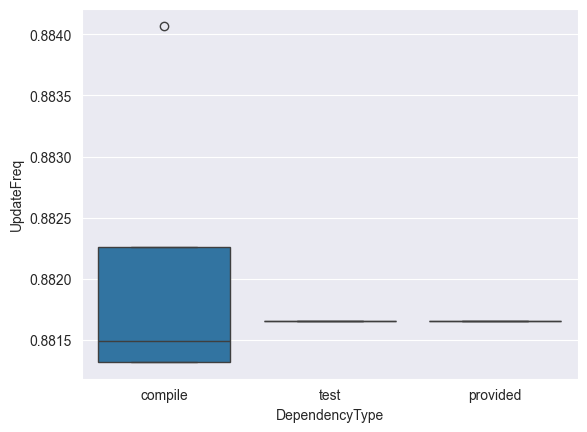

In [12]:
# Delete outliers for better visibility
filt_df = df[df["UpdateFreq"] < 1]
filt_df = filt_df[filt_df["UpdateFreq"] > 0.80]
sns.boxplot(data=filt_df, x="DependencyType", y="UpdateFreq")
plt.show()

In [13]:
# Convert dependency type to dummies
dummy_df = pd.get_dummies(df, columns=["DependencyType"], drop_first=False)
dummy_df


,Artifact,ReleaseCount,Popularity,UpdateFreq,DependencyType_compile,DependencyType_provided,DependencyType_test
0,com.google.apis:google-api-services-adsense,4639,0,0.792583,True,False,False
1,com.google.apis:google-api-services-youtubeAna...,3281,0,1.060671,True,False,False
2,com.google.apis:google-api-services-genomics,3158,0,0.884067,True,False,False
3,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881322,True,False,False
4,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,3,0.881322,True,False,False
5,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881659,True,False,False
6,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881659,False,False,True
7,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,2967,0,0.881659,False,True,False


In [14]:
# See correlation of variables to update frequency
df_temp = dummy_df.drop("Artifact", axis=1, inplace=False)
df_temp.corr()["UpdateFreq"]

ReleaseCount              -0.388464
Popularity                -0.063908
UpdateFreq                 1.000000
DependencyType_compile     0.094831
DependencyType_provided   -0.062081
DependencyType_test       -0.062081
Name: UpdateFreq, dtype: float64

These are the coefficients for correlation, but it doesn't definitely show, which regressor has the most influence. We should try to train a linear regression to see the coefficients.

In [15]:
X = df_temp.drop(columns=["UpdateFreq"])
y = df_temp["UpdateFreq"]

model = LinearRegression()
model.fit(X, y)

print("Feature Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Feature Coefficients: [-6.67365821e-05 -1.59319101e-02  3.16390506e-02 -1.58195253e-02
 -1.58195253e-02]
Intercept: 1.095485764004359


The biggest absolut number of coefficient has dependency type compile. Lets see, if it is also statistically significant

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ReleaseCount             8 non-null      int64
 1   Popularity               8 non-null      int64
 2   DependencyType_compile   8 non-null      bool 
 3   DependencyType_provided  8 non-null      bool 
 4   DependencyType_test      8 non-null      bool 
dtypes: bool(3), int64(2)
memory usage: 284.0 bytes


In [17]:
import statsmodels.api as sm

# covert bool types to int 
X = X.astype({'DependencyType_compile': 'int',
              'DependencyType_provided': 'int',
              'DependencyType_test': 'int'})
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             UpdateFreq   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                 -0.766
Method:                 Least Squares   F-statistic:                    0.2412
Date:                Wed, 04 Dec 2024   Prob (F-statistic):              0.898
Time:                        14:24:10   Log-Likelihood:                 11.065
No. Observations:                   8   AIC:                            -12.13
Df Residuals:                       3   BIC:                            -11.73
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\tom\poly\cloud\LOG8415-Final\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


                         ReleaseCount  Popularity  DependencyType_compile  \
ReleaseCount                 1.000000   -0.190248                0.290608   
Popularity                  -0.190248    1.000000                0.218218   
DependencyType_compile       0.290608    0.218218                1.000000   
DependencyType_provided     -0.190248   -0.142857               -0.654654   
DependencyType_test         -0.190248   -0.142857               -0.654654   

                         DependencyType_provided  DependencyType_test  
ReleaseCount                           -0.190248            -0.190248  
Popularity                             -0.142857            -0.142857  
DependencyType_compile                 -0.654654            -0.654654  
DependencyType_provided                 1.000000            -0.142857  
DependencyType_test                    -0.142857             1.000000  


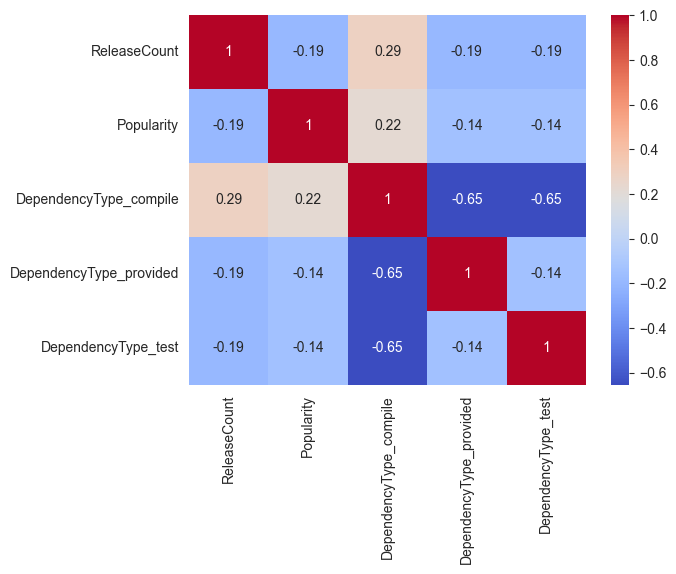

In [18]:
corr_matrix = X.corr()
print(corr_matrix)

# Visualize using a heatmap

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()
